In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

import requests
import tarfile
import imageio
import cv2
import glob
import os

### Pull the data from the internet and write it to a file then unpack the file to disk.

Don't bother running this if you've already downloaded the dataset. 

We are unpacking the file into the directory that the notebook is running in.  Don't worry the coil-100 dataset should only take a few minutes to download on a good connection.

In [2]:
%%time
if not os.path.isfile('coil-100.tar.gz'):
    results = requests.get('http://www.cs.columbia.edu/CAVE/databases/SLAM_coil-20_coil-100/coil-100/coil-100.tar.gz')
    with open("coil_100.tar.gz", "wb") as code:
        code.write(results.content)

    images_zip = tarfile.open('coil_100.tar.gz', mode='r:gz')
    images_zip.extractall()

CPU times: user 19.8 s, sys: 7.49 s, total: 27.3 s
Wall time: 4min 52s


### Read our images from disk via the wonders of imageio.

They are read in as 128x128x3 ndarrays.  We make use of flatten to collapse them down to  a list of 7202, 49152 dimensional vectors.

In [3]:
feature_vectors = []
filelist = glob.glob('./coil-100/*.ppm')
for filename in filelist:
    im = cv2.imread(filename)
    feature_vectors.append(im.flatten())

### Now we have our data in a list of vectors.  Let's extract the object id's from the files and cast to data frame (in case we want to explore things further)

In [4]:
labels = pd.Series(filelist).str.extract("obj([0-9]+)", expand=False)

### The pandas data frame here would be too expensive both in time and memory to construct

In [5]:
%%time
data = np.vstack(feature_vectors)
print(data.shape)

(7200, 49152)
CPU times: user 185 ms, sys: 305 ms, total: 490 ms
Wall time: 561 ms


### Now let's use UMAP to embed these points into a two dimensional space.

A little parameter tweaking is required here in order find a particularly attractive embedding of our space.

In [6]:
fit = umap.UMAP(n_neighbors=10, random_state=42, metric='euclidean')
%time u = fit.fit_transform(data)

CPU times: user 2min 49s, sys: 12.6 s, total: 3min 2s
Wall time: 3min 10s


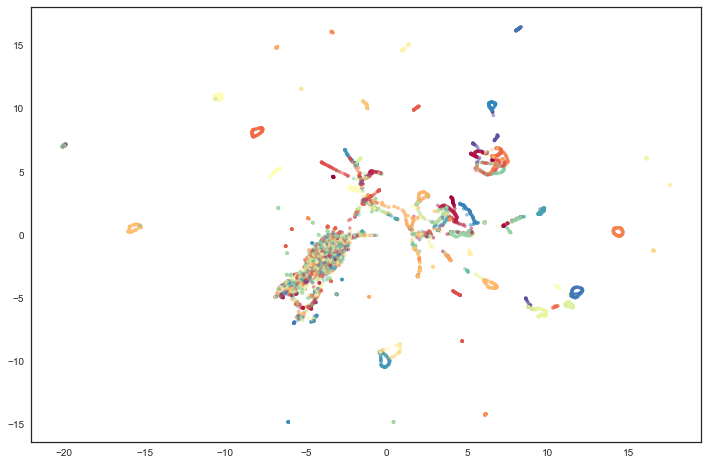

In [7]:
plt.scatter(u[:,0], u[:,1], c=labels, cmap="Spectral", s=10, alpha=0.5)

We see that are are able to preserve a number of the high dimensional structures within this data set.  

### Now we need to run t-SNE on our data

In [8]:
import sklearn.manifold
sklearn.__version__

'0.19.0'

In [9]:
fit_tsne = sklearn.manifold.TSNE()
%time u_tsne = fit_tsne.fit_transform(data)

CPU times: user 49min 5s, sys: 53.1 s, total: 49min 58s
Wall time: 50min 29s


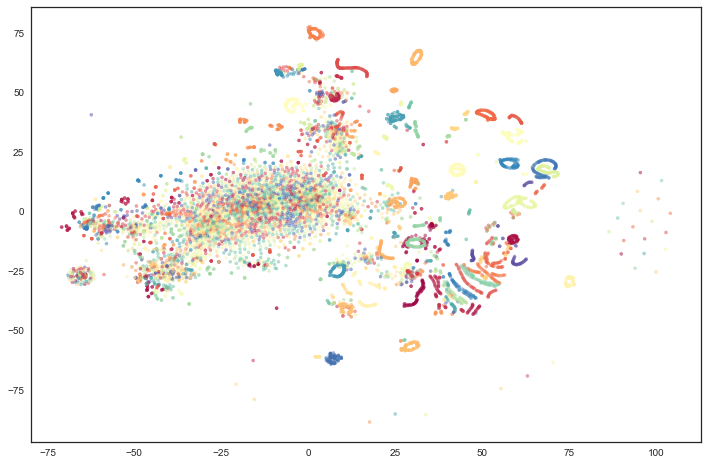

In [10]:
plt.scatter(u_tsne[:,0], u_tsne[:,1], c=labels, cmap="Spectral", s=10, alpha=0.5)